In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-07-27 00:27:59--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: 'helper_functions.py'

     0K ..........                                            100% 8.24M=0.001s

2023-07-27 00:28:00 (8.24 MB/s) - 'helper_functions.py' saved [10246/10246]



In [2]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [3]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent\test'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [4]:
train_dir_10_percent = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"


In [5]:
import tensorflow as tf

In [6]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_10_percent,
                                                                            image_size=IMG_SIZE,

                                                                            label_mode="categorical",
                                                                            batch_size=32)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode="categorical",
                                                                batch_size=32)



Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [7]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

## Model 0 : Building a transfer learning model using the Keras Functional API

The sequential API is straight forward but functional gives us more flexibility with out models 

In [8]:
## Create base model using tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# Freeze the base model
base_model.trainable = False

# Create inputs into our model
inputs = tf.keras.layers.Input(shape=(224,224,3),name="Input Layer")

## If using ResNet50v2 you will need to normalize inputs
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# Pass the inputs  
x = base_model(inputs)
print(f"Shape after passing inputs through base model:{x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D:{x.shape}")

outputs = tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)

model_0 = tf.keras.Model(inputs,outputs)

model_0.compile(loss="categorical_crossentropy",optimizer = tf.keras.optimizers.Adam(),metrics=["accuracy"])
history_10_percent = model_0.fit(train_data_10_percent,epochs=5,steps_per_epoch=len(train_data_10_percent),validation_data=test_data,validation_steps=int(0.25*len(test_data)),callbacks=[create_tensorboard_callback(dir_name="trainsferlearning",experiment_name="10_percent")])

Shape after passing inputs through base model:(None, 7, 7, 1280)
Shape after GlobalAveragePooling2D:(None, 1280)
Saving TensorBoard log files to: trainsferlearning/10_percent/20230727-205801


c:\Users\samim\anaconda3\envs\tfgpu\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 1/5
24/24 [==============================] - 100s 1s/step - loss: 1.9041 - accuracy: 0.3960 - val_loss: 1.3718 - val_accuracy: 0.7056
Epoch 2/5
24/24 [==============================] - 8s 337ms/step - loss: 1.1459 - accuracy: 0.7560 - val_loss: 0.9216 - val_accuracy: 0.7911
Epoch 3/5
24/24 [==============================] - 7s 292ms/step - loss: 0.8478 - accuracy: 0.8000 - val_loss: 0.7399 - val_accuracy: 0.8191
Epoch 4/5
24/24 [==============================] - 7s 272ms/step - loss: 0.6902 - accuracy: 0.8387 - val_loss: 0.6673 - val_accuracy: 0.8339
Epoch 5/5
24/24 [==============================] - 6s 255ms/step - loss: 0.5870 - accuracy: 0.8720 - val_loss: 0.6425 - val_accuracy: 0.8306


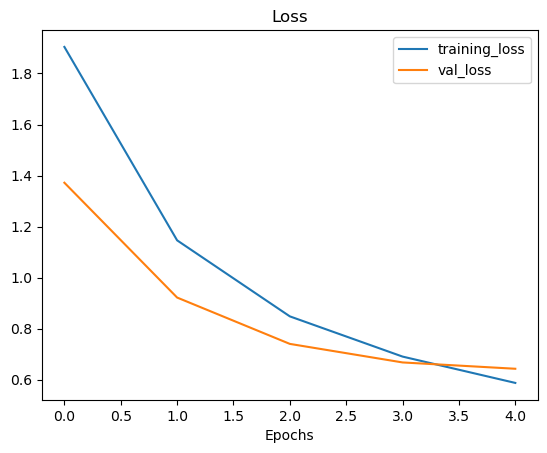

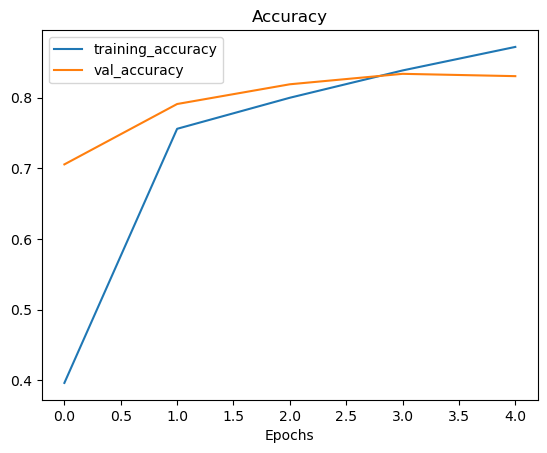

In [9]:
plot_loss_curves(history_10_percent)

In [10]:
model_0.evaluate(test_data)

79/79 [==============================] - 12s 140ms/step - loss: 0.6156 - accuracy: 0.8352


[0.6156235933303833, 0.8352000117301941]

In [12]:
# Check the layers in our base model
for layer_number,layer in enumerate(base_model.layers):
    print(layer_number,layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

In [13]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [14]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [15]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

^C


In [16]:
train_dir_1_percent = "10_food_classes_1_percent/train" 
test_dir = "10_food_classes_1_percent/test"

In [17]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent\test'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\sushi'

In [18]:
IMG_SIZE=(224,224)
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,label_mode="categorical",image_size=IMG_SIZE,batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,image_size=IMG_SIZE,label_mode="categorical",batch_size=BATCH_SIZE)


Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing


In [20]:
data_augumentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    # preprocessing.Rescaling(1./255)
],name="data_augumentation")

(-0.5, 483.5, 321.5, -0.5)

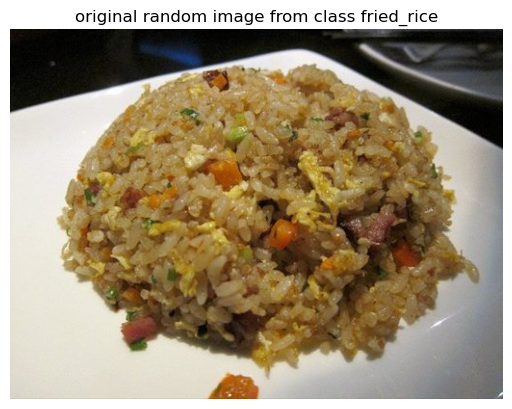

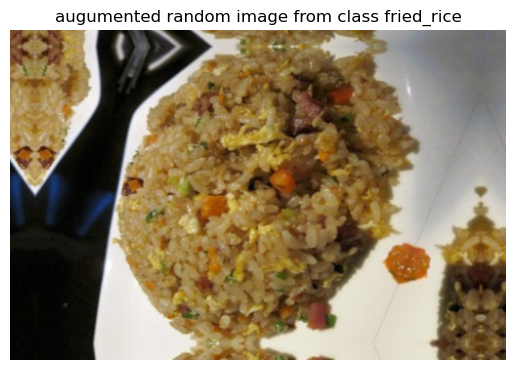

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/"+target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" +random_image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"original random image from class {target_class}")
plt.axis(False)
# print(img)

# plotting augumented image

augumented_img = data_augumentation(tf.expand_dims(img,axis=0))
plt.figure()
plt.title(f"augumented random image from class {target_class}")
plt.imshow(tf.squeeze(augumented_img)/255.)
plt.axis(False)

# print(augumented_img)

In [22]:
input_shape=(224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False


inputs = layers.Input(shape=input_shape,name="input_layer")

x = data_augumentation(inputs)

x= base_model(x,training=False)
x =  layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(10,activation="softmax",name="output_layer")(x)

model_1 = keras.Model(inputs,outputs)
model_1.compile(loss="categorical_crossentropy",optimizer= tf.keras.optimizers.Adam(),metrics=["accuracy"])
history_1_percent = model_1.fit(train_data_1_percent,epochs=5,steps_per_epoch = len(train_data_1_percent),validation_data=test_data,validation_steps=int(0.25*len(test_data)),callbacks=[create_tensorboard_callback(dir_name="trainsferlearning",experiment_name="1_percent_data_aug")])


Saving TensorBoard log files to: trainsferlearning/1_percent_data_aug/20230728-021643
Epoch 1/5


--2023-07-28 02:16:26--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.192.80, 142.250.192.112, 142.251.42.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.192.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: '10_food_classes_1_percent.zip.1'

     0K .......... .......... .......... .......... ..........  0%  109K 19m56s
    50K .......... .......... .......... .......... ..........  0%  165K 16m33s
   100K .......... .......... .......... .......... ..........  0%  439K 12m41s
   150K .......... .......... .......... .......... ..........  0%  429K 10m46s
   200K .......... .......... .......... .......... ..........  0%  481K 9m31s
   250K .......... .......... .......... .......... ..........  0%  745K 8m25s
   300K .......... .......... .......... .......... ..........  0

3/3 [==============================] - 18s 4s/step - loss: 2.3689 - accuracy: 0.1571 - val_loss: 2.2582 - val_accuracy: 0.1957
Epoch 2/5
3/3 [==============================] - 5s 2s/step - loss: 2.1900 - accuracy: 0.2143 - val_loss: 2.1343 - val_accuracy: 0.2845
Epoch 3/5
3/3 [==============================] - 5s 2s/step - loss: 1.9611 - accuracy: 0.4000 - val_loss: 2.0731 - val_accuracy: 0.2878
Epoch 4/5
3/3 [==============================] - 6s 3s/step - loss: 1.8552 - accuracy: 0.4143 - val_loss: 1.9572 - val_accuracy: 0.3701
Epoch 5/5
3/3 [==============================] - 10s 4s/step - loss: 1.6686 - accuracy: 0.6429 - val_loss: 1.8877 - val_accuracy: 0.4145


## Model 2 feature extraction model with 10 percent of data and data augumentation 


In [23]:
train_dir_10_percent = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [24]:
import tensorflow as tf
IMG_SIZE = (224,224)
train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,label_mode="categorical",image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,label_mode="categorical",image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [25]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

In [26]:
data_augumentation= Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomWidth(0.2),
    # preprocessing.Rescaling(1./255)
])
input_shape =(224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False
inputs = layers.Input(shape=input_shape,name="input_layer")
x=data_augumentation(inputs)
x=base_model(x,training=False)
x=layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(10,activation="softmax")(x)
model_2= tf.keras.Model(inputs,outputs)
model_2.compile(loss="categorical_crossentropy",optimizer = tf.keras.optimizers.Adam(),metrics=["accuracy"])


In [27]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, None, None, 3)     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
____________________________________________

## Create a model checkpoint 
intermediately saves the model the full model or just the weights this is useful so we can come and start where we left offf


In [29]:
# Set checkpoint path 
checkpoint_path =  'ten_percent_model_checpoints_weight/checkpoint.ckpt'
# Create a model checkpiont that saves the model's weights only 
checkpoint_callback  = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,save_best_only=False,save_freq="epoch",verbose=1)

In [30]:
model_2_history = model_2.fit(train_data_10_percent,epochs=5,steps_per_epoch = len(train_data_10_percent),validation_data=test_data,validation_steps=int(0.25*len(test_data)),callbacks=[checkpoint_callback])


Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9761 - accuracy: 0.3667
Epoch 00001: saving model to ten_percent_model_checpoints_weight\checkpoint.ckpt
24/24 [==============================] - 30s 961ms/step - loss: 1.9761 - accuracy: 0.3667 - val_loss: 1.4512 - val_accuracy: 0.6480
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.2455 - accuracy: 0.7267
Epoch 00002: saving model to ten_percent_model_checpoints_weight\checkpoint.ckpt
24/24 [==============================] - 15s 602ms/step - loss: 1.2455 - accuracy: 0.7267 - val_loss: 0.9763 - val_accuracy: 0.7895
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.9433 - accuracy: 0.7773
Epoch 00003: saving model to ten_percent_model_checpoints_weight\checkpoint.ckpt
24/24 [==============================] - 20s 812ms/step - loss: 0.9433 - accuracy: 0.7773 - val_loss: 0.8101 - val_accuracy: 0.7977
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.7602 - accura

In [31]:
model_0.evaluate(test_data)

79/79 [==============================] - 12s 139ms/step - loss: 0.6156 - accuracy: 0.8352


[0.6156234741210938, 0.8352000117301941]

In [32]:
model_2.evaluate(test_data)

79/79 [==============================] - 11s 133ms/step - loss: 0.6304 - accuracy: 0.8360


[0.6303966641426086, 0.8360000252723694]

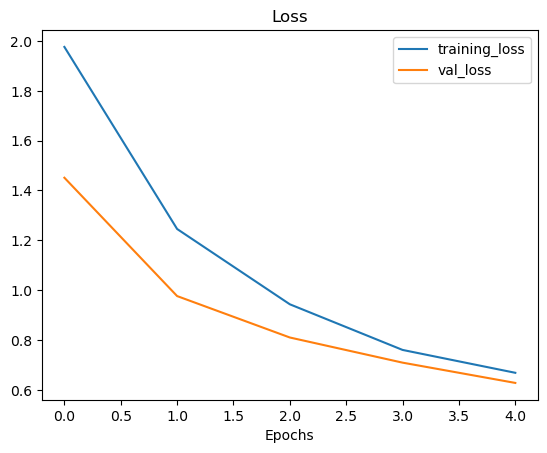

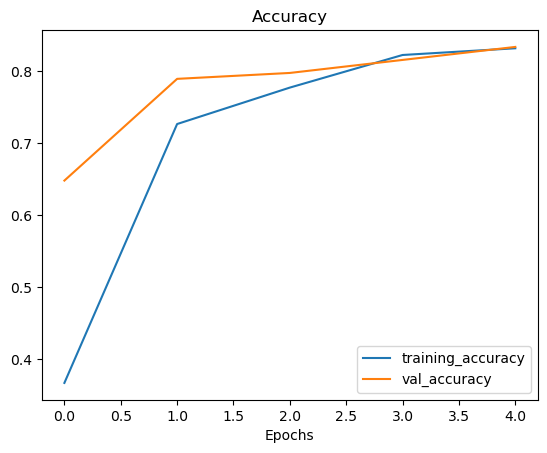

In [33]:
plot_loss_curves(model_2_history)

In [34]:
model_2.load_weights(checkpoint_path)

In [35]:
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 12s 138ms/step - loss: 0.6304 - accuracy: 0.8360


In [36]:
import numpy as np

In [38]:
np.isclose??

Signature: np.isclose(a, b, rtol=1e-05, atol=1e-08, equal_nan=False)
Source:   
@array_function_dispatch(_isclose_dispatcher)
def isclose(a, b, rtol=1.e-5, atol=1.e-8, equal_nan=False):
    """
    Returns a boolean array where two arrays are element-wise equal within a
    tolerance.

    The tolerance values are positive, typically very small numbers.  The
    relative difference (`rtol` * abs(`b`)) and the absolute difference
    `atol` are added together to compare against the absolute difference
    between `a` and `b`.

    .. warning:: The default `atol` is not appropriate for comparing numbers
                 that are much smaller than one (see Notes).

    Parameters
    ----------
    a, b : array_like
        Input arrays to compare.
    rtol : float
        The relative tolerance parameter (see Notes).
    atol : float
        The absolute tolerance parameter (see Notes).
    equal_nan : bool
        Whether to compare NaN's as equal.  If True, NaN's in `a` will be
       